# Feature selection/search - new rounds 

Increasing the number of features to be used in the model

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd ../Desktop/Insight/2012_MEPS/

/Users/bstankev/Desktop/Insight/2012_MEPS


## Load a new subset of features from consolidated.csv

In [136]:
# load MEPS dataset with only a subset of columns - race, marriage
# education, active duty, student, honorable discharge
MEPS_newsub = pd.read_csv('consolidated.csv', 
                        usecols=["DUID", "PID", "DUPERSID", "HISPANX",
                                 "HISPCAT",
                                 "MARRY42X", "MARRY53X", "MARRY12X", 
                                 "HIDEG", "EDRECODE", "FTSTU31X", 
                                 "FTSTU42X", "FTSTU53X", "FTSTU12X",
                                 "ACTDTY31", "ACTDTY42", "ACTDTY53",
                                 "HONRDC31", "HONRDC42", "HONRDC53",
                             ])

In [137]:
MEPS_newsub.head()

,DUID,PID,DUPERSID,HISPANX,HISPCAT,MARRY42X,MARRY53X,MARRY12X,HIDEG,EDRECODE,FTSTU31X,FTSTU42X,FTSTU53X,FTSTU12X,ACTDTY31,ACTDTY42,ACTDTY53,HONRDC31,HONRDC42,HONRDC53
0,20004,101,20004101,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN,1 MARRIED,1 MARRIED,1 MARRIED,-1 INAPPLICABLE,"14 BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED
1,20004,102,20004102,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN,1 MARRIED,1 MARRIED,1 MARRIED,-1 INAPPLICABLE,13 GED OR HS GRAD,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED
2,20004,103,20004103,1 HISPANIC,5 CENTRAL OR SOUTH AMERICAN,6 UNDER 16 - INAPPLICABLE,6 UNDER 16 - INAPPLICABLE,6 UNDER 16 - INAPPLICABLE,-1 INAPPLICABLE,2 2ND GRADE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,3 UNDER 16 - INAPPLICABLE,3 UNDER 16 - INAPPLICABLE,3 UNDER 16 - INAPPLICABLE,3 16 OR YOUNGER - INAPPLICABLE,3 16 OR YOUNGER - INAPPLICABLE,3 16 OR YOUNGER - INAPPLICABLE
3,20005,101,20005101,1 HISPANIC,3 DOMINICAN,4 SEPARATED,4 SEPARATED,4 SEPARATED,-1 INAPPLICABLE,"14 BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED
4,20005,102,20005102,1 HISPANIC,3 DOMINICAN,5 NEVER MARRIED,5 NEVER MARRIED,5 NEVER MARRIED,-1 INAPPLICABLE,"14 BEYOND HS,COLLEGE(NO 4YR DEG),ASSOC DEG",1 FULL-TIME,1 FULL-TIME,1 FULL-TIME,1 FULL-TIME,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT FT ACTIVE DUTY,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED,2 NO - NOT HONORABLY DISCHARGED


In [138]:
# drop superfluous columns
MEPS_newsub = MEPS_newsub.drop(['MARRY42X','MARRY53X','FTSTU31X','FTSTU42X','FTSTU53X',
                                'ACTDTY31','ACTDTY42','HONRDC31','HONRDC42'],axis = 1)

In [139]:
MEPS_newsub.dtypes

DUID         int64
PID          int64
DUPERSID     int64
HISPANX     object
HISPCAT     object
MARRY12X    object
HIDEG       object
EDRECODE    object
FTSTU12X    object
ACTDTY53    object
HONRDC53    object
dtype: object

In [140]:
# get rid of string information in column, keep integer information
cols = ['HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X',
        'ACTDTY53','HONRDC53']
for col in cols:
    MEPS_newsub[col] = MEPS_newsub[col].str.split(' ').str[0].astype(float)

In [141]:
MEPS_newsub.head()

,DUID,PID,DUPERSID,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY53,HONRDC53
0,20004,101,20004101,1,5,1,-1,14,-1,2,2
1,20004,102,20004102,1,5,1,-1,13,-1,2,2
2,20004,103,20004103,1,5,6,-1,2,-1,3,3
3,20005,101,20005101,1,3,4,-1,14,-1,2,2
4,20005,102,20005102,1,3,5,-1,14,1,2,2


In [145]:
# change negative numbers to NaN
for col in cols:
    MEPS_newsub[col].loc[MEPS_newsub[col] < 0] = np.nan


In [146]:
MEPS_newsub.head()

,DUID,PID,DUPERSID,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY53,HONRDC53
0,20004,101,20004101,1,5,1,NaN,14,NaN,2,2
1,20004,102,20004102,1,5,1,NaN,13,NaN,2,2
2,20004,103,20004103,1,5,6,NaN,2,NaN,3,3
3,20005,101,20005101,1,3,4,NaN,14,NaN,2,2
4,20005,102,20005102,1,3,5,NaN,14,1,2,2


# Understand the shape of new features

## HISPANX category

Binary - yes or no whether person is hispanic

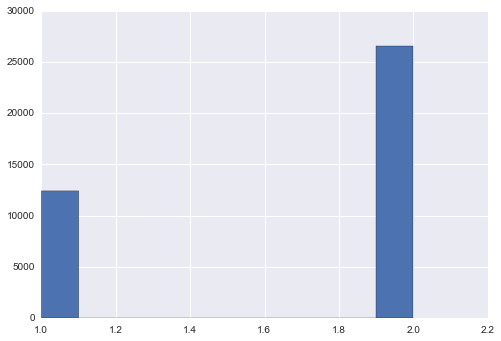

In [147]:
# 1 = Hispanic
# 2 = Not Hispanic
MEPS_newsub['HISPANX'].dropna().hist()

## HISPCAT category

gives more information on exact ethnicity of the person - could be useful given the large and diverse population of hispanic people in the US

largest category (other than non-hispanic) is Mexican/Mexican American

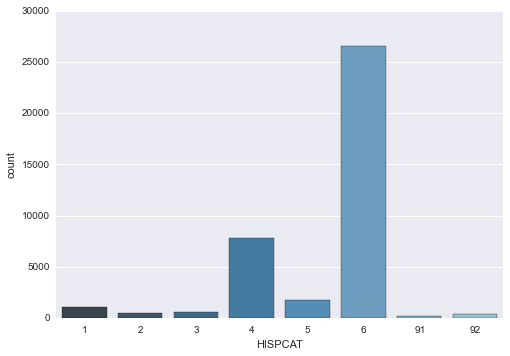

In [148]:
# 1 = Puerto Rican
# 2 = CUban/Cuban American
# 3 = Dominican
# 4 = Mexican/Mexican American
# 5 = Central or South AMerican 
# 6 = Non-Hispanic
# 91 = Other Latin AMerican
# 92 = Other Hispanic/Latin
sns.countplot(MEPS_newsub['HISPCAT'].dropna(), palette='Blues_d',
              order=[1,2,3,4,5,6,91,92])

## Marriage status

need to go to the documentation for what each value represents

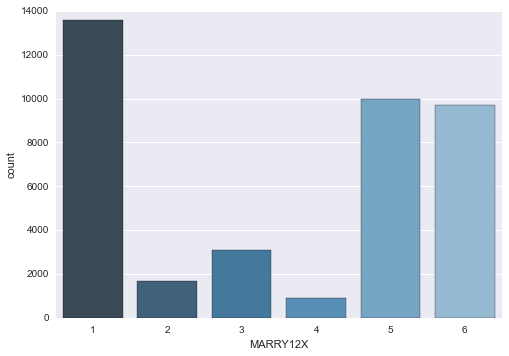

In [149]:
# MARRY12X - no clue what things mean
# 6 = Under 16 – Inapplicable
sns.countplot(MEPS_newsub['MARRY12X'].dropna(), palette='Blues_d',
             order=[1,2,3,4,5,6])

## HIDEG category

highest degress attained

need to go to the documentation to better understand what each value represents

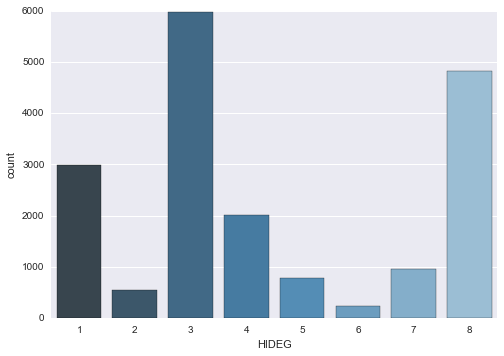

In [153]:
# HIDEG
# 1 = no deg
# 2 =
# 3 = 
# 4 = 
# 5 = 
# 6 = 
# 7 = 
# 8 = Under 16 – Inapplicable
sns.countplot(MEPS_newsub['HIDEG'].dropna(), palette='Blues_d',
             order=[1,2,3,4,5,6,7,8])

## EDRECODE category

represents "years" of education with 16 being the maximum

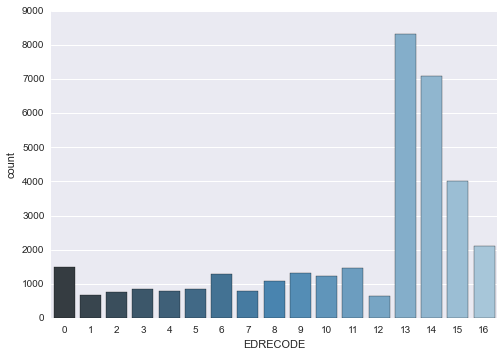

In [152]:
sns.countplot(MEPS_newsub['EDRECODE'].dropna(), palette='Blues_d',
             order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

## FTSTU12X category

Full time student? 


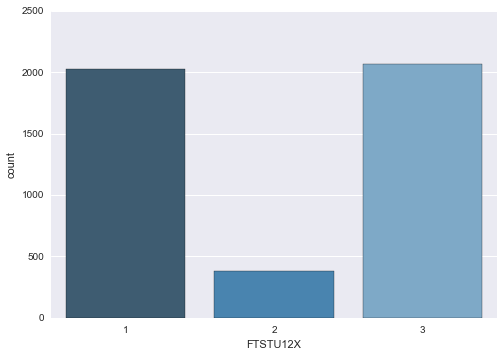

In [154]:
sns.countplot(MEPS_newsub['FTSTU12X'].dropna(), palette='Blues_d',
             order=[1,2,3])

## ACTDTY53 category

is the person on active duty?

need to understand what the values represent

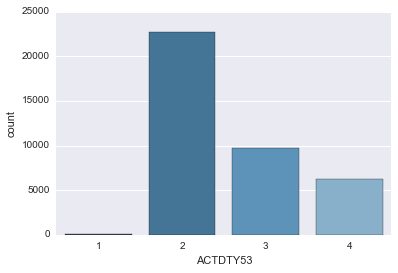

In [553]:
sns.countplot(MEPS_newsub['ACTDTY53'].dropna(), palette='Blues_d',
             order=[1,2,3,4])

## HONRDC category

was the person honorably discharged?

need to understand what the values represent

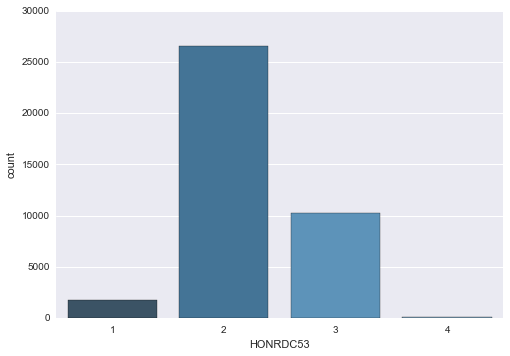

In [155]:
sns.countplot(MEPS_newsub['HONRDC53'].dropna(), palette='Blues_d',
             order=[1,2,3,4])

# Exploratory Modeling

Quick modeling detour to see where I'm at, also to see initial feature importances. Only on OBVEXP12 data

1. one-hot encoding of categorical nominal features
2. standardization of continuous/categorical ordinal features
3. Gradient boosted regression tree
4. output MAE
5. output feature importances

In [167]:
# bring in other dataset with expenditure and initial features
cls_lbl = pd.read_csv('cls_lbl.csv')

In [157]:
# merge datasets
ndf =  pd.merge(cls_lbl, MEPS_newsub, on=['DUPERSID', 'DUPERSID'])

In [158]:
ndf.head()

,Unnamed: 0,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,...,DUID,PID,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY53,HONRDC53
0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,NaN,...,20004,101,1,5,1,NaN,14,NaN,2,2
1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,NaN,...,20004,102,1,5,1,NaN,13,NaN,2,2
2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,NaN,...,20004,103,1,5,6,NaN,2,NaN,3,3
3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,NaN,...,20005,101,1,3,4,NaN,14,NaN,2,2
4,4,20005,102,20005102,490,127,NaN,NaN,NaN,NaN,...,20005,102,1,3,5,NaN,14,1,2,2


## Only doing the modeling on OBVEXP12 data

Dataset is one that is missing the least number of data points

In [159]:
df = ndf[np.isfinite(ndf['OBVEXP12'])]

In [160]:
X = df[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
         'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53']]
y = df['OBVEXP12'].values
ylog = df['OBVEXP12'].values

In [161]:
X.fillna(0, inplace=True)

/Users/bstankev/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [162]:
X.head()

,MNHLTHSTAT,HLTHSTAT,RACEV1X,SEX,AGELAST,POVCAT12,POVLEV12,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY53,HONRDC53
3,2.333333,4.000000,1,1,51,3,132.8,1,3,4,0,14,0,2,2
4,1.333333,1.666667,1,1,21,3,132.8,1,3,5,0,14,1,2,2
5,1.000000,1.000000,1,1,18,3,132.8,1,3,5,0,10,1,2,2
11,1.000000,2.000000,1,2,34,3,167.5,2,6,1,0,16,0,2,2
12,1.000000,4.666667,1,1,36,3,167.5,2,6,1,0,13,0,2,2


In [163]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
x1 = X[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53']]
x1 = x1.values
enc = OneHotEncoder()
enc.fit(x1)

x2 = enc.transform(x1).toarray()

In [164]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

s1 = preprocessing.StandardScaler().fit(X[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE']])
s2 = s1.transform(X[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE']])

In [165]:
x4 = np.append(x2,s2, axis=1)

In [166]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
xg_train, xg_test, yg_train, yg_test = train_test_split(x4, y, random_state=rng)
clf_2 = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
clf_2.fit(xg_train,yg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [168]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yg_test, clf_2.predict(xg_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1179.7076


In [169]:
x4.shape

(23509, 52)

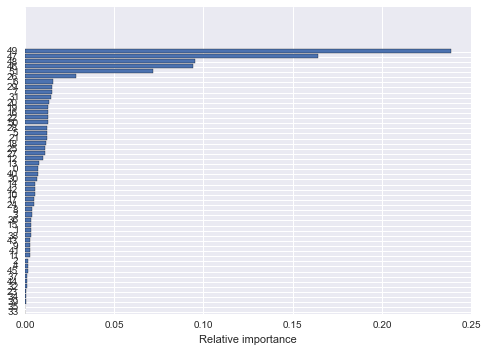

In [171]:
names = range(52)
# sort importances
indices = np.argsort(clf_2.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), clf_2.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.25, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# Round 2 of importing features - Health Status ones this time!
## Pre-imputation of features (hence the large number of 0's) 
Focusing on health status features this round (both concrete and abstract)

In [173]:
# load MEPS dataset with only a subset of columns - race, marriage
# education, active duty, student, honorable discharge
MEPS_ns2 = pd.read_csv('consolidated.csv', 
                        usecols=["DUID", "PID", "DUPERSID", 
                                 "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED", 
                                 "CHOLDX", "CHOLAGED", "CANCERDX", 
                                 "DIABDX", "DIABAGED", "JTPAIN31",
                                 "JTPAIN53", "ADHDADDX", "ADHDAGED",
                                 "ANYLIM12", "BMINDX53", "ADSMOK42",
                                 "ADNSMK42", "ADMALS42", "ADMWLM42",
                                 "ADPAIN42", "ADCAPE42", "ADNRGY42",
                                 "ADDOWN42", "ADSOCA42",
                             ])

In [174]:
MEPS_ns2.head()

,DUID,PID,DUPERSID,HIBPDX,HIBPAGED,STRKDX,STRKAGED,CHOLDX,CHOLAGED,CANCERDX,...,BMINDX53,ADSMOK42,ADNSMK42,ADMALS42,ADMWLM42,ADPAIN42,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42
0,20004,101,20004101,2 NO,-1,2 NO,-1,2 NO,-1,2 NO,...,30.6,2 NO,-1 INAPPLICABLE,3 SOME OF THE TIME,3 SOME OF THE TIME,1 NOT AT ALL,2 MOST OF THE TIME,3 SOME OF THE TIME,4 LITTLE OF THE TIME,5 NONE OF THE TIME
1,20004,102,20004102,2 NO,-1,2 NO,-1,2 NO,-1,2 NO,...,30.1,2 NO,-1 INAPPLICABLE,3 SOME OF THE TIME,5 NONE OF THE TIME,1 NOT AT ALL,3 SOME OF THE TIME,3 SOME OF THE TIME,4 LITTLE OF THE TIME,5 NONE OF THE TIME
2,20004,103,20004103,-1 INAPPLICABLE,-1,-1 INAPPLICABLE,-1,-1 INAPPLICABLE,-1,-1 INAPPLICABLE,...,-1.0,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE,-1 INAPPLICABLE
3,20005,101,20005101,1 YES,41,2 NO,-1,2 NO,-1,2 NO,...,25.1,2 NO,-1 INAPPLICABLE,1 ALL OF THE TIME,5 NONE OF THE TIME,5 EXTREMELY,3 SOME OF THE TIME,4 LITTLE OF THE TIME,2 MOST OF THE TIME,2 MOST OF THE TIME
4,20005,102,20005102,2 NO,-1,2 NO,-1,2 NO,-1,2 NO,...,21.3,2 NO,-1 INAPPLICABLE,5 NONE OF THE TIME,5 NONE OF THE TIME,1 NOT AT ALL,1 ALL OF THE TIME,1 ALL OF THE TIME,5 NONE OF THE TIME,5 NONE OF THE TIME


In [175]:
cat_col = ["HIBPDX","STRKDX","CHOLDX", "CANCERDX", 
           "DIABDX", "JTPAIN31","JTPAIN53", "ADHDADDX", 
           "ANYLIM12", "ADSMOK42","ADMALS42", "ADMWLM42",
           "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]
for col in cat_col:
    MEPS_ns2[col] = MEPS_ns2[col].str.split(' ').str[0].astype(float)
    

In [177]:
MEPS_ns2.head()

,DUID,PID,DUPERSID,HIBPDX,HIBPAGED,STRKDX,STRKAGED,CHOLDX,CHOLAGED,CANCERDX,...,BMINDX53,ADSMOK42,ADNSMK42,ADMALS42,ADMWLM42,ADPAIN42,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42
0,20004,101,20004101,2,-1,2,-1,2,-1,2,...,30.6,2,-1 INAPPLICABLE,3,3,1,2,3,4,5
1,20004,102,20004102,2,-1,2,-1,2,-1,2,...,30.1,2,-1 INAPPLICABLE,3,5,1,3,3,4,5
2,20004,103,20004103,-1,-1,-1,-1,-1,-1,-1,...,-1.0,-1,-1 INAPPLICABLE,-1,-1,-1,-1,-1,-1,-1
3,20005,101,20005101,1,41,2,-1,2,-1,2,...,25.1,2,-1 INAPPLICABLE,1,5,5,3,4,2,2
4,20005,102,20005102,2,-1,2,-1,2,-1,2,...,21.3,2,-1 INAPPLICABLE,5,5,1,1,1,5,5


In [178]:
# get rid of ADNSMK42 - unhelpful
hlthdf = MEPS_ns2.drop('ADNSMK42',axis=1)

In [179]:
# change negative numbers to 0
for column in hlthdf:
    hlthdf[hlthdf < 0] = 0


In [180]:
hlthdf.head()

,DUID,PID,DUPERSID,HIBPDX,HIBPAGED,STRKDX,STRKAGED,CHOLDX,CHOLAGED,CANCERDX,...,ANYLIM12,BMINDX53,ADSMOK42,ADMALS42,ADMWLM42,ADPAIN42,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42
0,20004,101,20004101,2,0,2,0,2,0,2,...,2,30.6,2,3,3,1,2,3,4,5
1,20004,102,20004102,2,0,2,0,2,0,2,...,2,30.1,2,3,5,1,3,3,4,5
2,20004,103,20004103,0,0,0,0,0,0,0,...,2,0.0,0,0,0,0,0,0,0,0
3,20005,101,20005101,1,41,2,0,2,0,2,...,1,25.1,2,1,5,5,3,4,2,2
4,20005,102,20005102,2,0,2,0,2,0,2,...,2,21.3,2,5,5,1,1,1,5,5


In [181]:
hlthdf.shape

(38974, 26)

# Plot and understand the new features

every plot has large column on '0' because the data is sparse (e.g., not many people have a stroke diagnosis)

## high blood pressure, age at diagnosis

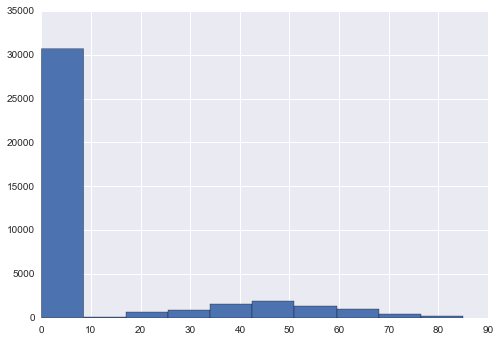

In [182]:
hlthdf['HIBPAGED'].dropna().hist()

## stroke, age at diagnosis

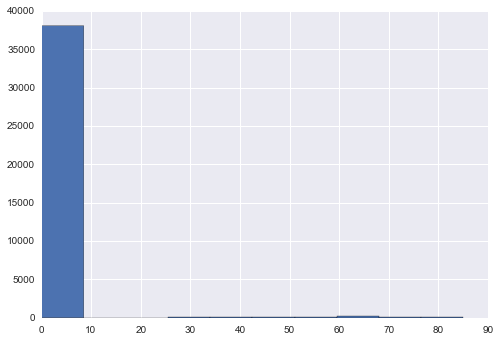

In [183]:
hlthdf['STRKAGED'].dropna().hist()

## high cholesterol, age at diagnosis

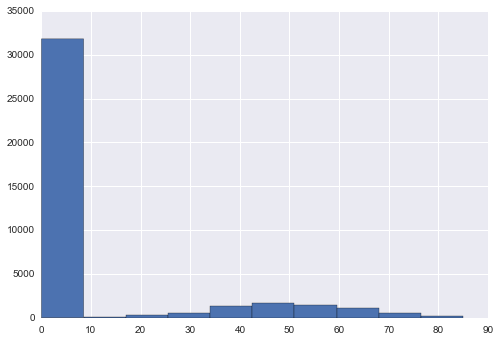

In [184]:
hlthdf['CHOLAGED'].dropna().hist()

## Smoking status

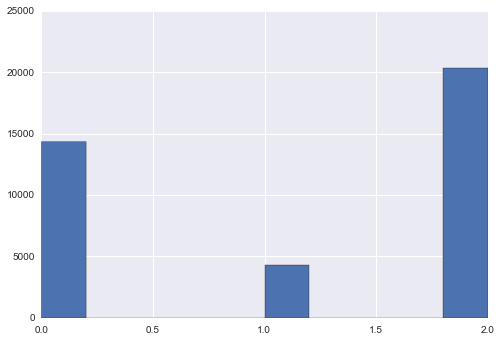

In [185]:
hlthdf['ADSMOK42'].dropna().hist()

# Merge into one mega-dataset with all the features + expenditures from the 3 rounds of feature inspection/selection

In [186]:
# merge previous dataframe with the new hlthdf with the health feature additions
nhlthdf =  pd.merge(ndf, hlthdf, on=['DUPERSID', 'DUPERSID'], how='outer')

In [187]:
nhlthdf.head()

,Unnamed: 0,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,...,ANYLIM12,BMINDX53,ADSMOK42,ADMALS42,ADMWLM42,ADPAIN42,ADCAPE42,ADNRGY42,ADDOWN42,ADSOCA42
0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,NaN,...,2,30.6,2,3,3,1,2,3,4,5
1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,NaN,...,2,30.1,2,3,5,1,3,3,4,5
2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,NaN,...,2,0.0,0,0,0,0,0,0,0,0
3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,NaN,...,1,25.1,2,1,5,5,3,4,2,2
4,4,20005,102,20005102,490,127,NaN,NaN,NaN,NaN,...,2,21.3,2,5,5,1,1,1,5,5


# SAVE NEW .csv file with updated features

In [627]:
nhlthdf.to_csv('feat_new.csv')

In [598]:
#A = testdf[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12',
#         'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
#        "DIABAGED", "BMINDX53", "ADPAIN42", "ADCAPE42", "ADNRGY42"]]


#b = testdf['OBVEXP12].values
A = testdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST',
            'POVCAT12','POVLEV12','HISPANX','HISPCAT','MARRY12X',
            'HIDEG', 
            'EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
            "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", 
            "CHOLAGED", "CANCERDX","DIABDX", "DIABAGED", "JTPAIN31",
            "JTPAIN53", "ADHDADDX", "ADHDAGED","ANYLIM12", "BMINDX53", 
            "ADSMOK42","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
            "ADNRGY42","ADDOWN42", "ADSOCA42"]]

In [601]:
A = A.fillna(0)

In [421]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

sa1 = preprocessing.StandardScaler().fit(A[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12',
                                             'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
                                            "DIABAGED", "BMINDX53", "ADPAIN42", "ADCAPE42", "ADNRGY42"]])
sa2 = sa1.transform(A[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12',
                        'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
                        "DIABAGED", "BMINDX53", "ADPAIN42", "ADCAPE42", "ADNRGY42"]])

In [327]:
#a4 = np.append(a1,sa2, axis=1)

In [422]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(sa2, b, random_state=rng)
aclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
aclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [423]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, aclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1.2310


In [424]:
b_pred = aclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred)  

0.0017732302969004632

In [426]:
sa2.shape

(311, 13)

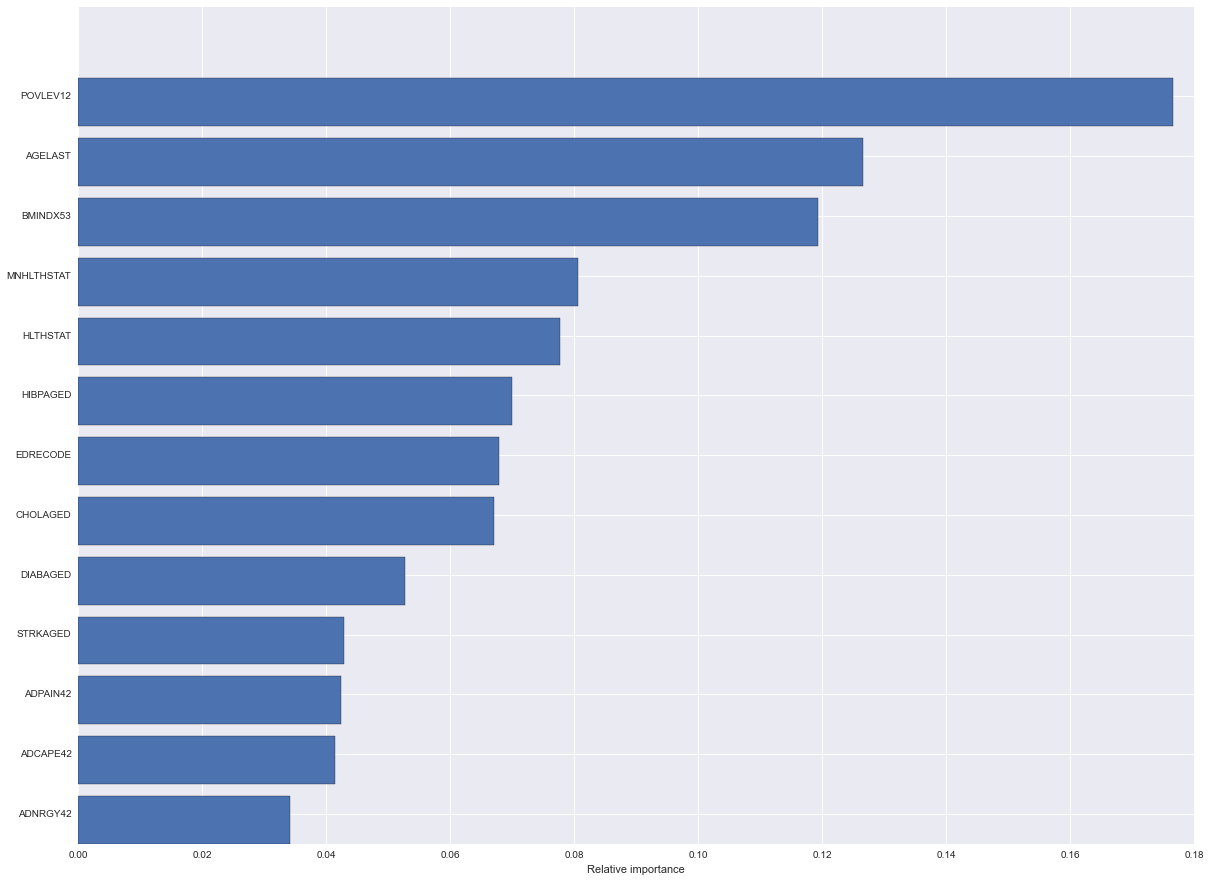

In [427]:
names = ['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12',
         'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
         "DIABAGED", "BMINDX53", "ADPAIN42", "ADCAPE42", "ADNRGY42"]

m
fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(aclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), aclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

In [335]:
indices = np.argsort(aclf.feature_importances_)

In [336]:
indices

array([16,  9, 10, 13,  2, 11, 29, 14,  6, 23, 18, 15,  0,  1,  8, 36, 32,
        7,  4, 17, 37, 12,  3,  5, 31, 35, 24, 34, 27, 33, 21, 28, 19, 26,
       25, 30, 20, 22])

## RandomSearchCV - RecursiveFeatureEliminationCV - RandomForest

### RandomSearchCV #1 (w/ RandomForest regressor and all features)

In [613]:
tfeat = nhlthdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
                 'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
                 "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", "CHOLAGED", "CANCERDX", 
                 "DIABDX", "DIABAGED", "JTPAIN31","JTPAIN53", "ADHDADDX", "ADHDAGED",
                 "ANYLIM12", "BMINDX53", "ADSMOK42","ADMALS42", "ADMWLM42",
                 "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]]
tfeat = tfeat.fillna(0)

afeat = tfeat[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53',
               'HONRDC53',"HIBPDX", "STRKDX", "CHOLDX", "CANCERDX", 
               "DIABDX", "JTPAIN31","JTPAIN53", "ADHDADDX","ANYLIM12", "ADSMOK42"]]

# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

sa1 = preprocessing.StandardScaler().fit(tfeat[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVCAT12','POVLEV12',
                                                'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
                                                "DIABAGED", "BMINDX53", "ADHDAGED","ADMALS42", "ADMWLM42",
                                                "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]])
sa2 = sa1.transform(tfeat[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVCAT12','POVLEV12',
                                                'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
                                                "DIABAGED", "BMINDX53", "ADHDAGED","ADMALS42", "ADMWLM42",
                                                "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]])
a4 = np.append(afeat,sa2, axis=1)
b = testdf['OBVEXPlog'].values

In [614]:
nhlthdf.shape

(24274, 68)

In [615]:
a4.shape

(24274, 38)

In [616]:
xtrain, xtest, ytrain, ytest = train_test_split(a4, b, random_state=rng)

In [617]:
# RandomSearchCV for hyperparameter space
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from time import time
from operator import itemgetter

rfr = RandomForestRegressor(n_estimators=20)

# Utility function to report best scores
def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [1,2,3,4,5,6,7],
              "max_features": [0.1, 0.3, 0.7],
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              }

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(xtrain, ytrain)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.grid_scores_)

RandomizedSearchCV took 12.32 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.214 (std: 0.002)
Parameters: {'max_features': 0.7, 'min_samples_split': 7, 'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 3}

Model with rank: 2
Mean validation score: 0.206 (std: 0.004)
Parameters: {'max_features': 0.3, 'min_samples_split': 9, 'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 6}

Model with rank: 3
Mean validation score: 0.202 (std: 0.003)
Parameters: {'max_features': 0.7, 'min_samples_split': 8, 'bootstrap': False, 'max_depth': 6, 'min_samples_leaf': 5}



## Recursive Feature Elimination - RFECV (w/ RandomForest, hyperparams defined above)

In [618]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV

class RandomForestRegressorWithCoef(RandomForestRegressor):
    def fit(self, *args, **kwargs):
        super(RandomForestRegressorWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_
        
rf = RandomForestRegressorWithCoef(max_features=0.7, min_samples_split=10,
                                   bootstrap=True,max_depth=7, min_samples_leaf=5)

rfecv = RFECV(estimator=rf, step=1)
rfecv.fit(xtrain, ytrain)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 38


In [608]:
print rfecv.ranking_
print rfecv.grid_scores_ 
print rfecv.support_

[1 1 5 1 1 1 4 6 1 3 7 2 1 8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[ 0.11348329  0.13162916  0.15932894  0.17906214  0.18405819  0.19482522
  0.20133678  0.20745173  0.20724959  0.20744781  0.20949142  0.20610799
  0.20926511  0.21084464  0.21054226  0.21023249  0.21124859  0.21257037
  0.21004018  0.21239659  0.21006584  0.21014089  0.21243973  0.21103224
  0.21126316  0.21425955  0.2107869   0.21109494  0.21105672  0.2106893
  0.21555105  0.21137505  0.21338489  0.21137411  0.21127518  0.21338367
  0.21435342  0.21282383]
[ True  True False  True  True  True False False  True False False False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


# Getting feature Importances and Doing some models

## RandomForestRegression (w/ hyperparams and features selected above)

In [609]:
a4_feat = rfecv.transform(a4)
a4_feat.shape
#xtrain, xtest, ytrain, ytest = train_test_split(a4, b, random_state=rng)


(24274, 31)

In [610]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(rxa4, rxb, random_state=rng)
rxclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
rxclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [611]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, rxclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1900.6032


In [612]:
b_pred = rxclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred) 

-0.43964235275462626

In [438]:
from sklearn.ensemble import ExtraTreesClassifier
test = ExtraTreesClassifier()
X_new = test.fit(ag_train,bg_train).transform(ag_train)
test.feature_importances_   
X_new.shape 

(233, 7)

In [439]:
testc = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
testc.fit(X_new,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

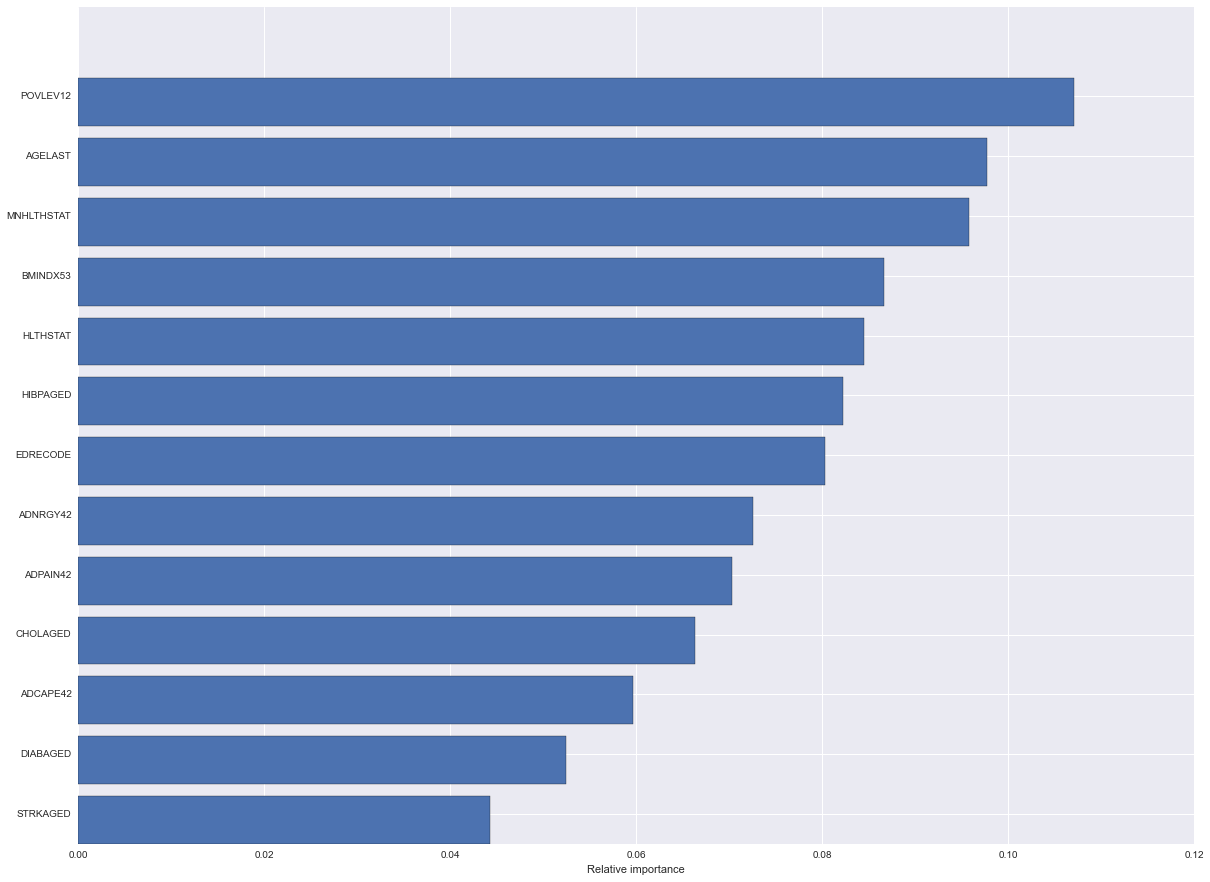

In [443]:
names = ['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12',
         'EDRECODE',"HIBPAGED", "STRKAGED","CHOLAGED",  
         "DIABAGED", "BMINDX53", "ADPAIN42", "ADCAPE42", "ADNRGY42"]

fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(test.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), test.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# Do modeling on other expenditure types

In [341]:
rxdf = nhlthdf[np.isfinite(nhlthdf['RXEXP12'])]

In [342]:
rxa = rxdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
         'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
         "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", "CHOLAGED", "CANCERDX", 
         "DIABDX", "DIABAGED", "JTPAIN31","JTPAIN53", "ADHDADDX", "ADHDAGED",
       "ANYLIM12", "BMINDX53", "ADSMOK42","ADMALS42", "ADMWLM42",
       "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]]
rxb = rxdf['RXEXP12'].values

In [343]:
Arx = rxa.fillna(0)

In [344]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
Arx1 = Arx[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42"]]

In [345]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

rxa1 = preprocessing.StandardScaler().fit(Arx[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
                                          "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53", 
                                           "ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", 
                                           "ADSOCA42"]])
rxa2 = rxa1.transform(Arx[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',"HIBPAGED", "STRKAGED",
                     "CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
                     "ADNRGY42","ADDOWN42","ADSOCA42"]])

In [346]:
rxa4 = np.append(Arx1,rxa2, axis=1)

In [347]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(rxa4, rxb, random_state=rng)
rxclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
rxclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [461]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(rxa4, rxb, random_state=rng)

class RandomForestRegressorWithCoef(RandomForestRegressor):
    def fit(self, *args, **kwargs):
        super(RandomForestRegressorWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_
        
rf = RandomForestRegressorWithCoef()
rfecv = RFECV(estimator=rf, step=1)
rfecv.fit(x_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 30


In [462]:
print rfecv.ranking_
print rfecv.grid_scores_ 

[1 1 5 1 1 1 7 8 2 4 9 1 1 6 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
[-0.74874764 -0.99544704 -1.1937304  -0.72950111 -0.70969916 -0.74122223
 -0.88850297 -0.66148582 -0.63975478 -0.81029967 -0.65348043 -0.68801579
 -0.78126046 -0.66930345 -0.6086369  -0.60637697 -0.45741378 -0.7828014
 -0.5445404  -0.81407571 -0.4932984  -0.78455425 -0.63397897 -0.9302264
 -1.20886906 -0.62591584 -0.56259816 -0.80720111 -0.50727359 -0.27710704
 -0.43334882 -0.99930467 -0.56080305 -1.2540095  -1.0151974  -0.87915054
 -0.9084617  -0.79453596]


In [348]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, rxclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1900.6445


In [396]:
b_pred = rxclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred)  

-1.3598807197044498

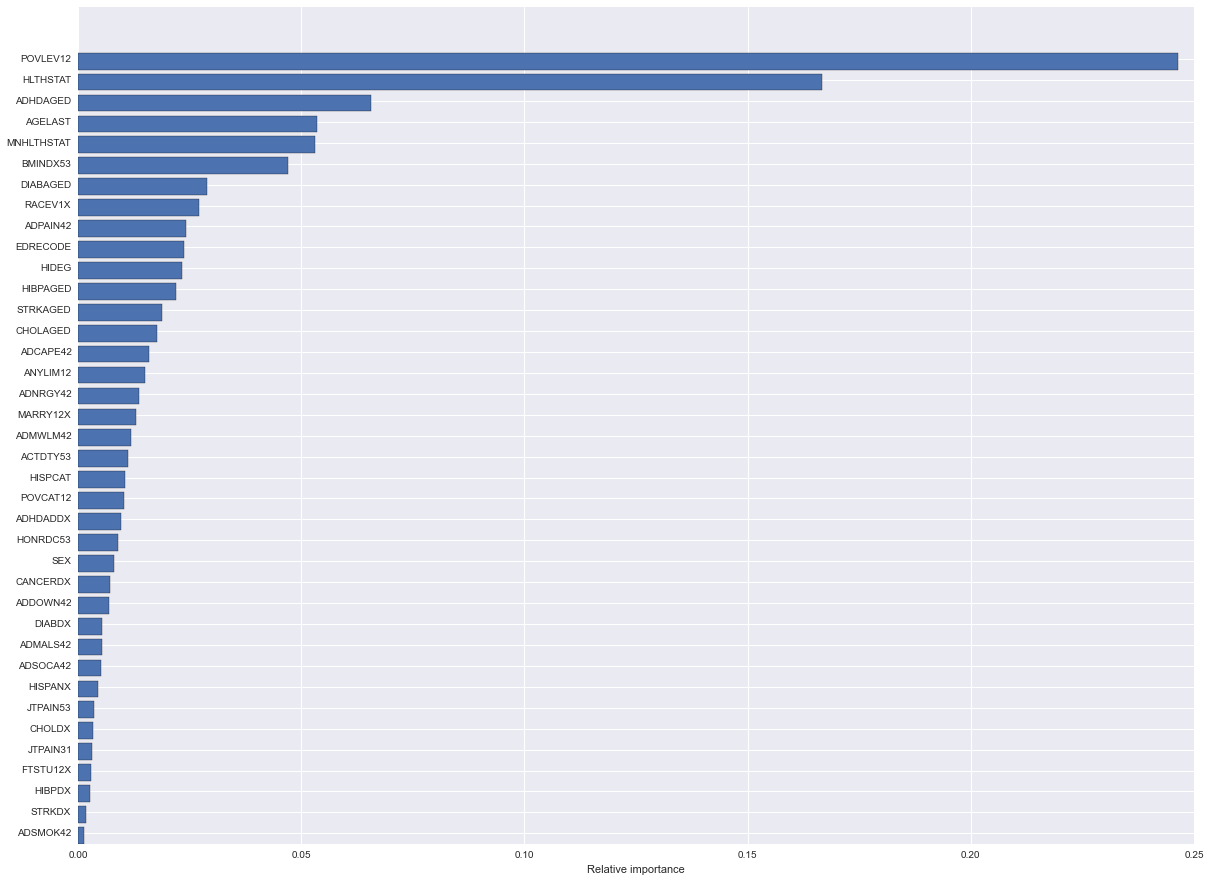

In [444]:
names = ['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42",'MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
        "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42",
         "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42","ADSOCA42"]

fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(rxclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), rxclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# ER visit expenses

In [350]:
erdf = nhlthdf[np.isfinite(nhlthdf['ERTEXP12'])]

In [351]:
erA = erdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
         'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
         "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", "CHOLAGED", "CANCERDX", 
         "DIABDX", "DIABAGED", "JTPAIN31","JTPAIN53", "ADHDADDX", "ADHDAGED",
       "ANYLIM12", "BMINDX53", "ADSMOK42","ADMALS42", "ADMWLM42",
       "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]]
erb = erdf['ERTEXP12'].values

In [352]:
erA = erA.fillna(0)

In [353]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
era1 = erA[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42"]]

In [354]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

ersa1 = preprocessing.StandardScaler().fit(erA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
                                          "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53", 
                                           "ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", 
                                           "ADSOCA42"]])
ersa2 = sa1.transform(erA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',"HIBPAGED", "STRKAGED",
                     "CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
                     "ADNRGY42","ADDOWN42","ADSOCA42"]])

In [355]:
era4 = np.append(era1,ersa2, axis=1)

In [356]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(era4, erb, random_state=rng)
erclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
erclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [468]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

x1_train, x1_test, y1_train, y1_test = train_test_split(era4, erb, random_state=rng)

class RandomForestRegressorWithCoef(RandomForestRegressor):
    def fit(self, *args, **kwargs):
        super(RandomForestRegressorWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_
        
rf1 = RandomForestRegressorWithCoef()
rfecv1 = RFECV(estimator=rf1, step=1)
rfecv1.fit(x1_train, y1_train)

print("Optimal number of features : %d" % rfecv1.n_features_)

Optimal number of features : 12


In [467]:
print rfecv1.ranking_
print rfecv1.grid_scores_ 

[1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1]
[-0.94377151 -0.75803777 -0.22960312 -0.1855375  -0.19276039 -0.21591671
 -0.26360669 -0.15952369 -0.20027186 -0.16661188 -0.23191348 -0.18240571
 -0.22874546 -0.22580638 -0.27472167 -0.24128752 -0.18563792 -0.18547817
 -0.21059811 -0.20728287 -0.12379159 -0.15914434 -0.15986969 -0.13711846
 -0.16591042 -0.13098175 -0.12805081 -0.19617046 -0.2020866  -0.17580745
 -0.20675837 -0.18614641 -0.1213652  -0.14248569 -0.12014043 -0.09243894
 -0.19242443 -0.10622601]


In [357]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, erclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 1391.4256


In [399]:
b_pred = erclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred)

-1.4863398383303275

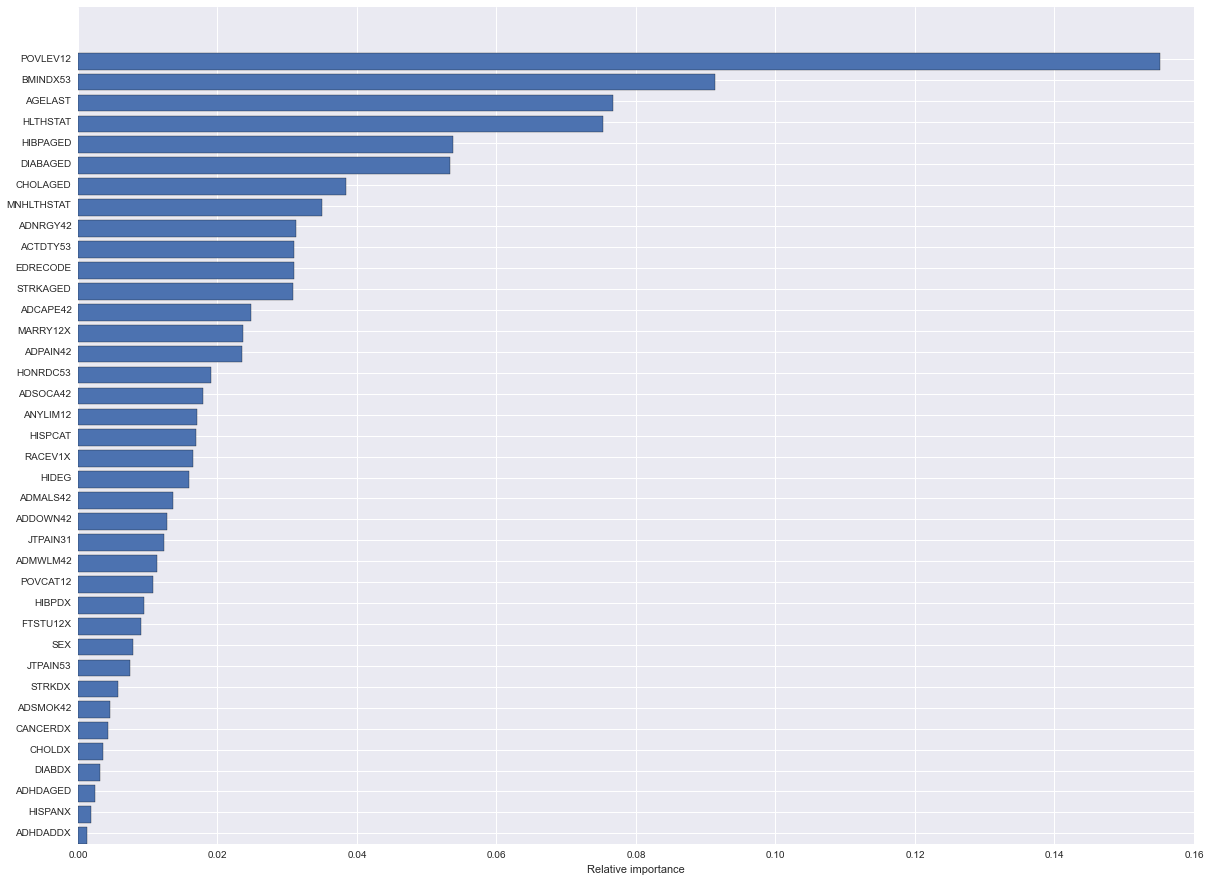

In [358]:
names = ['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42",'MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
        "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42",
         "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42","ADSOCA42"]

fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(erclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), erclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# IPTEXP12

In [368]:
nhlthdf = nhlthdf[np.isfinite(nhlthdf['IPTEXP12'])]

In [369]:
iptA = nhlthdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
         'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
         "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", "CHOLAGED", "CANCERDX", 
         "DIABDX", "DIABAGED", "JTPAIN31","JTPAIN53", "ADHDADDX", "ADHDAGED",
       "ANYLIM12", "BMINDX53", "ADSMOK42","ADMALS42", "ADMWLM42",
       "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]]
iptb = nhlthdf['IPTEXP12'].values

In [370]:
iptA = iptA.fillna(0)

In [371]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ipta1 = iptA[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42"]]

In [372]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

iptsa1 = preprocessing.StandardScaler().fit(iptA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
                                          "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53", 
                                           "ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", 
                                           "ADSOCA42"]])
iptsa2 = iptsa1.transform(iptA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',"HIBPAGED", "STRKAGED",
                     "CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
                     "ADNRGY42","ADDOWN42","ADSOCA42"]])

In [373]:
ipta4 = np.append(ipta1,iptsa2, axis=1)

In [374]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(ipta4, iptb, random_state=rng)
iptclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
iptclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [375]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, iptclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 17598.0775


In [398]:
b_pred = iptclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred)

-0.42366312426080177

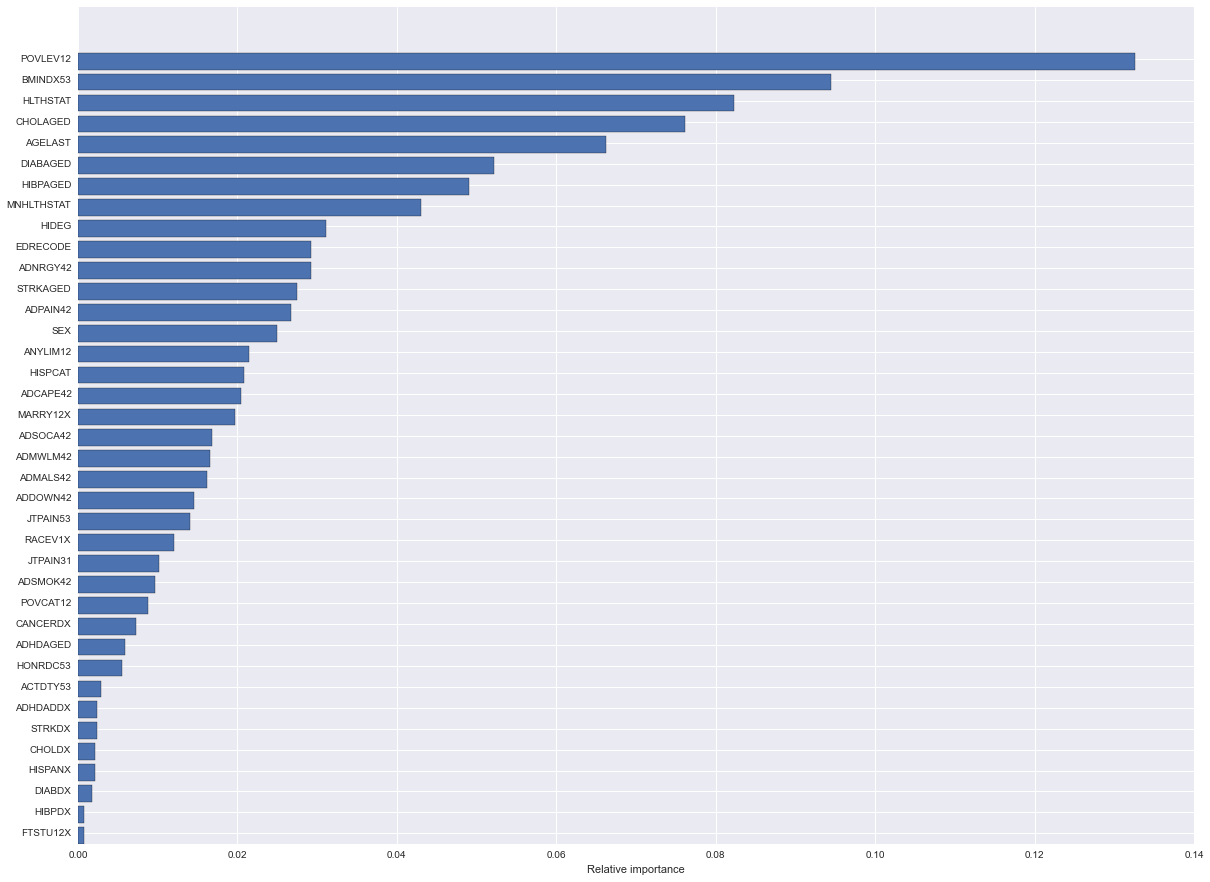

In [376]:
names = ['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42",'MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
        "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42",
         "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42","ADSOCA42"]

fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(iptclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), iptclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# HHAEXP12

In [377]:
nhlthdf = nhlthdf[np.isfinite(nhlthdf['HHAEXP12'])]

In [378]:
hhA = nhlthdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
         'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
         "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", "CHOLAGED", "CANCERDX", 
         "DIABDX", "DIABAGED", "JTPAIN31","JTPAIN53", "ADHDADDX", "ADHDAGED",
       "ANYLIM12", "BMINDX53", "ADSMOK42","ADMALS42", "ADMWLM42",
       "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]]
hhb = nhlthdf['HHAEXP12'].values

In [379]:
hhA = hhA.fillna(0)

In [380]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
hha1 = hhA[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42"]]

In [381]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

hhsa1 = preprocessing.StandardScaler().fit(hhA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
                                          "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53", 
                                           "ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", 
                                           "ADSOCA42"]])
hhsa2 = hhsa1.transform(hhA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',"HIBPAGED", "STRKAGED",
                     "CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
                     "ADNRGY42","ADDOWN42","ADSOCA42"]])

In [382]:
hha4 = np.append(hha1,hhsa2, axis=1)

In [383]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(hha4, hhb, random_state=rng)
hhclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
hhclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [384]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, hhclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 9969.3493


In [400]:
b_pred = hhclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred)

-1.2475108099516987

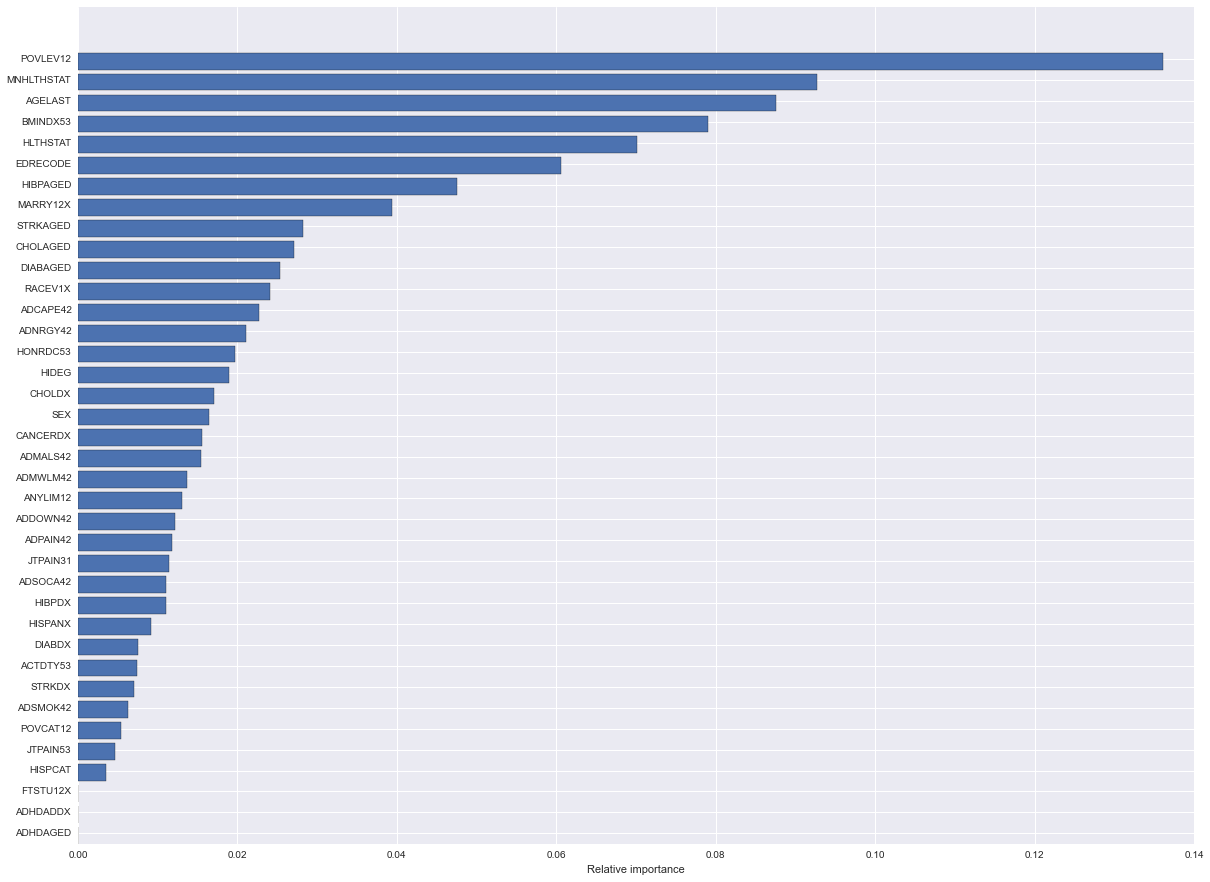

In [385]:
names = ['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42",'MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
        "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42",
         "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42","ADSOCA42"]

fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(hhclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), hhclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# TOTEXP12

In [386]:
nhlthdf = nhlthdf[np.isfinite(nhlthdf['TOTEXP12'])]

In [387]:
totA = nhlthdf[['MNHLTHSTAT','HLTHSTAT','RACEV1X', 'SEX', 'AGELAST','POVCAT12','POVLEV12',
         'HISPANX','HISPCAT','MARRY12X','HIDEG','EDRECODE','FTSTU12X','ACTDTY53','HONRDC53',
         "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED","CHOLDX", "CHOLAGED", "CANCERDX", 
         "DIABDX", "DIABAGED", "JTPAIN31","JTPAIN53", "ADHDADDX", "ADHDAGED",
       "ANYLIM12", "BMINDX53", "ADSMOK42","ADMALS42", "ADMWLM42",
       "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", "ADSOCA42"]]
totb = nhlthdf['TOTEXP12'].values

In [388]:
totA = totA.fillna(0)

In [389]:
# one hot encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
tota1 = totA[['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42"]]

In [390]:
# re-scale (normalize) continuous  & categorical (ordinal) data
from sklearn import preprocessing

totsa1 = preprocessing.StandardScaler().fit(totA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
                                          "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53", 
                                           "ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42", 
                                           "ADSOCA42"]])
totsa2 = totsa1.transform(totA[['MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',"HIBPAGED", "STRKAGED",
                     "CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42","ADPAIN42", "ADCAPE42", 
                     "ADNRGY42","ADDOWN42","ADSOCA42"]])

In [391]:
tota4 = np.append(tota1,totsa2, axis=1)

In [392]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.cross_validation import train_test_split
rng = np.random.RandomState(42)
ag_train, ag_test, bg_train, bg_test = train_test_split(tota4, totb, random_state=rng)
totclf = GradientBoostingRegressor(n_estimators=20000,learning_rate=0.01,
                                 max_depth=2,max_features=0.3,min_samples_leaf=5)
totclf.fit(ag_train,bg_train)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.01, loss='ls',
             max_depth=2, max_features=0.3, max_leaf_nodes=None,
             min_samples_leaf=5, min_samples_split=2, n_estimators=20000,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [393]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(bg_test, totclf.predict(ag_test))
print('Tuned GBRT MAE: %.4f' % mae)

Tuned GBRT MAE: 33409.4316


In [401]:
b_pred = totclf.predict(ag_test)
from sklearn.metrics import r2_score
r2_score(bg_test, b_pred)

-0.69124855702135246

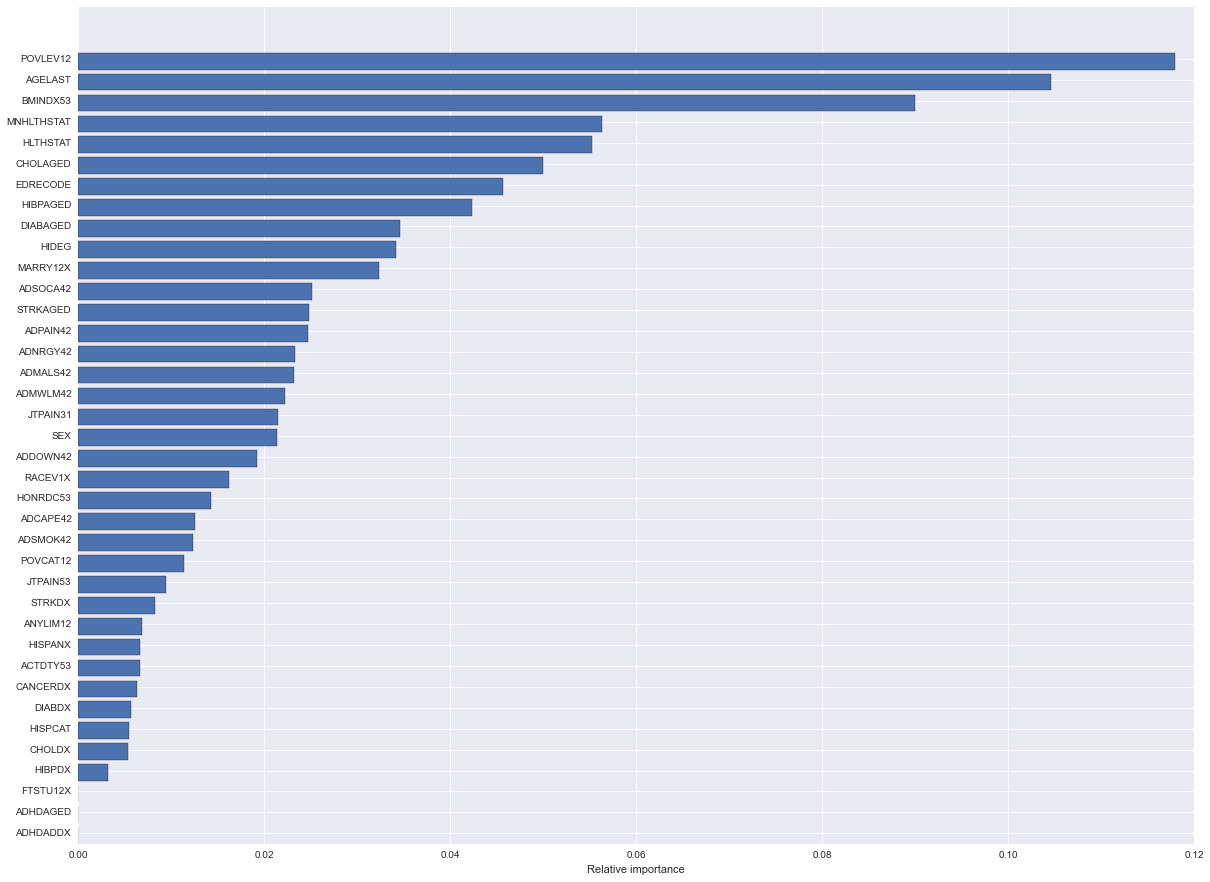

In [394]:
names = ['RACEV1X', 'SEX','HISPANX','HISPCAT','MARRY12X','HIDEG','FTSTU12X','ACTDTY53','HONRDC53',
       "HIBPDX","STRKDX", "CHOLDX", "CANCERDX","DIABDX","JTPAIN31","JTPAIN53", "ADHDADDX", 
       "ANYLIM12", "ADSMOK42",'MNHLTHSTAT','HLTHSTAT','AGELAST','POVLEV12','POVCAT12','EDRECODE',
        "HIBPAGED", "STRKAGED","CHOLAGED","DIABAGED", "ADHDAGED", "BMINDX53","ADMALS42", "ADMWLM42",
         "ADPAIN42", "ADCAPE42", "ADNRGY42","ADDOWN42","ADSOCA42"]

fig = plt.figure(figsize=(20,15))
# sort importances
indices = np.argsort(totclf.feature_importances_)
# plot as bar chart
plt.barh(np.arange(len(names)), totclf.feature_importances_[indices])
plt.yticks(np.arange(len(names)) + 0.5, np.array(names)[indices])
_ = plt.xlabel('Relative importance')

# Non-imputed data is not alright, Doing Imputation

# Trying out Imputation on features with NaNs

In [636]:
ndf.head()

,Unnamed: 0,DUID_x,PID_x,DUPERSID,OBVTCH12,OBVEXP12,ERTTCH12,ERTEXP12,IPTTCH12,IPTEXP12,...,DUID,PID,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY53,HONRDC53
0,0,20004,101,20004101,NaN,NaN,NaN,NaN,NaN,NaN,...,20004,101,1,5,1,NaN,14,NaN,2,2
1,1,20004,102,20004102,NaN,NaN,NaN,NaN,NaN,NaN,...,20004,102,1,5,1,NaN,13,NaN,2,2
2,2,20004,103,20004103,NaN,NaN,NaN,NaN,NaN,NaN,...,20004,103,1,5,6,NaN,2,NaN,3,3
3,3,20005,101,20005101,1100,451,NaN,NaN,NaN,NaN,...,20005,101,1,3,4,NaN,14,NaN,2,2
4,4,20005,102,20005102,490,127,NaN,NaN,NaN,NaN,...,20005,102,1,3,5,NaN,14,1,2,2


In [670]:
# load MEPS dataset with only a subset of columns - race, marriage
# education, active duty, student, honorable discharge
imp = pd.read_csv('consolidated.csv', 
                        usecols=["DUID", "PID", "DUPERSID", 
                                 "HIBPDX","HIBPAGED", "STRKDX", "STRKAGED", 
                                 "CHOLDX", "CHOLAGED", "CANCERDX", 
                                 "DIABDX", "DIABAGED", "JTPAIN31",
                                 "JTPAIN53", "ADHDADDX", "ADHDAGED",
                                 "ANYLIM12", "BMINDX53", "ADSMOK42",
                                 "ADNSMK42", "ADMALS42", "ADMWLM42",
                                 "ADPAIN42", "ADCAPE42", "ADNRGY42",
                                 "ADDOWN42", "ADSOCA42",
                             ])

In [671]:
imp_cat = imp[["HIBPDX","STRKDX",  
                     "CHOLDX", "CANCERDX", 
                     "DIABDX", "JTPAIN31",
                     "JTPAIN53", "ADHDADDX", 
                     "ANYLIM12", "ADSMOK42",
                     "ADMALS42", "ADMWLM42",
                     "ADPAIN42", "ADCAPE42", "ADNRGY42",
                                 "ADDOWN42", "ADSOCA42",
                             ]]
for column in imp_cat:
    imp_cat[column] = imp_cat[column].str.split(' ').str[0].astype(float)
    


/Users/bstankev/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [672]:
imp2 = imp.drop(["HIBPDX","STRKDX",  
                     "CHOLDX", "CANCERDX", 
                     "DIABDX", "JTPAIN31",
                     "JTPAIN53", "ADHDADDX", 
                     "ANYLIM12", "ADSMOK42",
                     "ADMALS42", "ADMWLM42",
                     "ADPAIN42", "ADCAPE42", "ADNRGY42",
                                 "ADDOWN42", "ADSOCA42",
                             ],axis=1)

In [684]:
impdf = pd.concat([imp2, imp_cat],axis=1)

In [685]:
impdf = impdf.drop('ADNSMK42',axis = 1)

In [686]:
# load MEPS dataset with only a subset of columns - race, marriage
# education, active duty, student, honorable discharge
mp2 = pd.read_csv('consolidated.csv', 
                        usecols=["DUPERSID", "HISPANX",
                                 "HISPCAT","MARRY12X", 
                                 "HIDEG", "EDRECODE",  "FTSTU12X",
                                 "ACTDTY42", "HONRDC42"
                             ])

In [687]:
mp3 = pd.read_csv('cls_lbl.csv')

In [688]:
impdf2 =  pd.merge(impdf, mp3, on=['DUPERSID', 'DUPERSID'])

In [690]:
impdf3 = pd.merge(impdf2,mp2,on=['DUPERSID', 'DUPERSID'],how='outer')

In [699]:
impdf3["HISPCAT"] = impdf3["HISPCAT"].str.split(' ').str[0].astype(float)
impdf3["MARRY12X"] = impdf3["MARRY12X"].str.split(' ').str[0].astype(float)
impdf3["HIDEG"] = impdf3["HIDEG"].str.split(' ').str[0].astype(float)
impdf3["EDRECODE"] = impdf3["EDRECODE"].str.split(' ').str[0].astype(float)
impdf3["FTSTU12X"] = impdf3["FTSTU12X"].str.split(' ').str[0].astype(float)
impdf3["ACTDTY42"] = impdf3["ACTDTY42"].str.split(' ').str[0].astype(float)
impdf3["HONRDC42"] = impdf3["HONRDC42"].str.split(' ').str[0].astype(float)
impdf3["HISPANX"] = impdf3["HISPANX"].str.split(' ').str[0].astype(float)

In [701]:
for column in impdf3:
    impdf3[column][(impdf3[column] < 0)] = np.nan

/Users/bstankev/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [730]:
impdf3.OBVEXP12 = impdf3.OBVEXP12.fillna(0)
impdf3.ERTEXP12 = impdf3.ERTEXP12.fillna(0)
impdf3.RXEXP12 = impdf3.RXEXP12.fillna(0)
impdf3.HHAEXP12 = impdf3.HHAEXP12.fillna(0)
impdf3.IPTEXP12 = impdf3.IPTEXP12.fillna(0)
impdf3.TOTEXP12 = impdf3.TOTEXP12.fillna(0)

In [731]:
impdf3.OBVEXP12.unique()

array([    0.,   451.,   127., ...,  3686.,  5026.,  4179.])

In [732]:
cols = impdf3.columns
cols

Index([u'DUID', u'PID', u'DUPERSID', u'HIBPAGED', u'STRKAGED', u'CHOLAGED', u'DIABAGED', u'ADHDAGED', u'BMINDX53', u'HIBPDX', u'STRKDX', u'CHOLDX', u'CANCERDX', u'DIABDX', u'JTPAIN31', u'JTPAIN53', u'ADHDADDX', u'ANYLIM12', u'ADSMOK42', u'ADMALS42', u'ADMWLM42', u'ADPAIN42', u'ADCAPE42', u'ADNRGY42', u'ADDOWN42', u'ADSOCA42', u'Unnamed: 0', u'DUID_x', u'PID_x', u'OBVTCH12', u'OBVEXP12', u'ERTTCH12', u'ERTEXP12', u'IPTTCH12', u'IPTEXP12', u'HHATCH12', u'HHAEXP12', u'RXEXP12', u'TOTTCH12', u'TOTEXP12', u'DUID_y', u'PID_y', u'AGELAST', u'SEX', u'RACEV1X', u'RTHLTH31', u'RTHLTH42', u'RTHLTH53', u'MNHLTH31', u'MNHLTH42', u'MNHLTH53', u'POVCAT12', u'POVLEV12', u'ageGrp', u'HLTHSTAT', u'MNHLTHSTAT', u'OBVGrp', u'OBVGrp2', u'HISPANX', u'HISPCAT', u'MARRY12X', u'HIDEG', u'EDRECODE', u'FTSTU12X', u'ACTDTY42', u'HONRDC42'], dtype='object')

In [733]:
from sklearn.preprocessing import Imputer
imp=Imputer(missing_values='NaN',strategy="median",axis=0,copy=False)
df_imp = imp.fit_transform(impdf3) 

In [734]:
df_imp = pd.DataFrame(df_imp)

In [735]:
df_imp.columns = cols

In [736]:
df_imp.head()

,DUID,PID,DUPERSID,HIBPAGED,STRKAGED,CHOLAGED,DIABAGED,ADHDAGED,BMINDX53,HIBPDX,...,OBVGrp,OBVGrp2,HISPANX,HISPCAT,MARRY12X,HIDEG,EDRECODE,FTSTU12X,ACTDTY42,HONRDC42
0,20004,101,20004101,46,58,50,50,7,30.6,2,...,1,1,1,5,1,3,14,2,2,2
1,20004,102,20004102,46,58,50,50,7,30.1,2,...,1,1,1,5,1,3,13,2,2,2
2,20004,103,20004103,46,58,50,50,7,27.0,2,...,1,1,1,5,6,3,2,2,3,3
3,20005,101,20005101,41,58,50,50,7,25.1,1,...,4,6,1,3,4,3,14,2,2,2
4,20005,102,20005102,46,58,50,50,7,21.3,2,...,2,3,1,3,5,3,14,1,2,2


# Save Imputed, merged, full dataset to imp.csv

In [737]:
# save to csv
df_imp.to_csv('imp.csv')